# <h1><center>Flight Price Prediction & Analysis</center></h1>

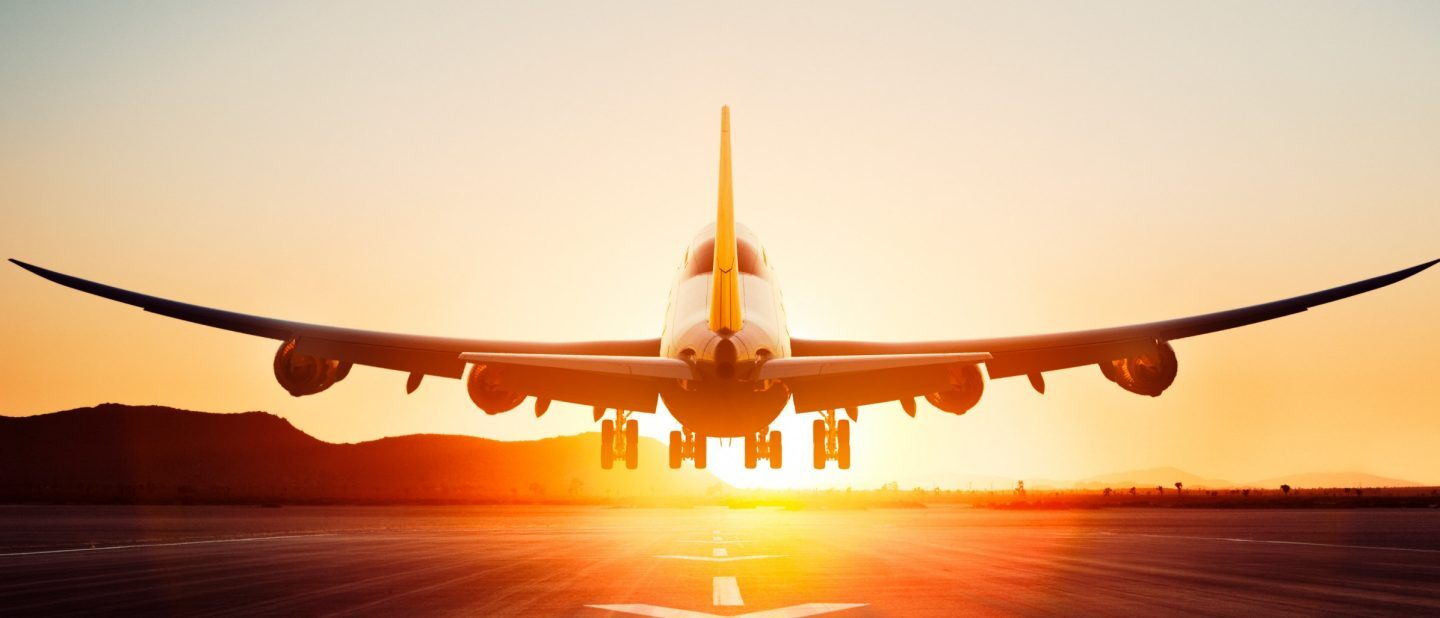

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score,mean_squared_error,accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('D:\Data Analysis\Filght_price_pred\Data_Train.csv')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [75]:
df_test=pd.read_csv('D:\Data Analysis\Filght_price_pred\Test_set.csv')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [76]:
final_df=df.append(df_test)
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [77]:
print('Total no of rows in {} and columns are {}'.format(final_df.shape[0],final_df.shape[1]))

Total no of rows in 13354 and columns are 11


In [78]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [79]:
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [109]:
final_df.isna().sum()

Airline               0
Source                0
Destination           0
Duration              0
Total_Stops        1900
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
Arrival_hour          0
Arrival_minutes       0
Dep_hour              0
Dep_minutes           0
dtype: int64

## EDA ANALYSIS

In [80]:
totstops=final_df.Total_Stops.value_counts().sort_values(ascending=False).reset_index()
totstops

,index,Total_Stops
0,1 stop,7056
1,non-stop,4340
2,2 stops,1899
3,3 stops,56
4,4 stops,2


<BarContainer object of 5 artists>

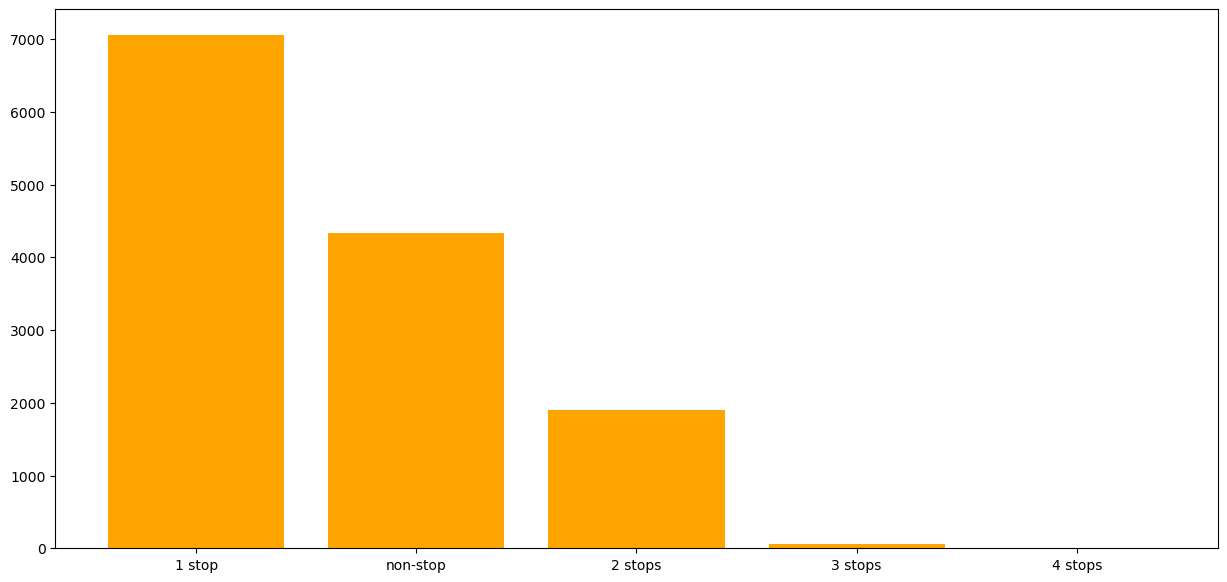

In [81]:
plt.bar(x=totstops['index'],height=totstops['Total_Stops'],color='orange')

Text(0.5, 1.0, 'Top Carriers')

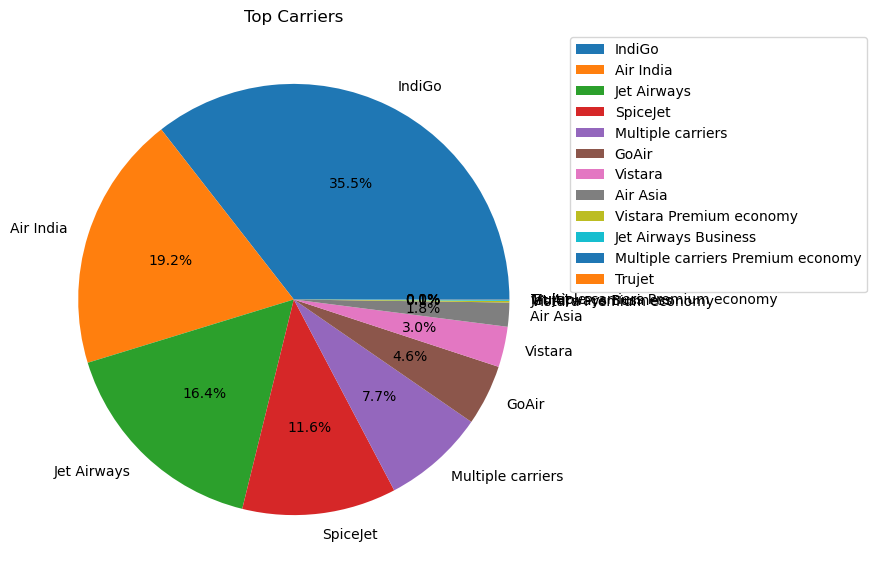

In [82]:
top_carriers=np.array(final_df['Airline'].value_counts(sort=True))
label=['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet','Multiple carriers', 'GoAir', 'Vistara', 'Air Asia','Vistara Premium economy','Jet Airways Business','Multiple carriers Premium economy','Trujet']
plt.rcParams['figure.figsize']=(15,7)
plt.pie(top_carriers,labels=label,autopct='%1.1f%%',pctdistance=0.6)
plt.legend(labels=label,bbox_to_anchor=(1,1))
plt.title('Top Carriers')

<AxesSubplot:xlabel='Price', ylabel='Count'>

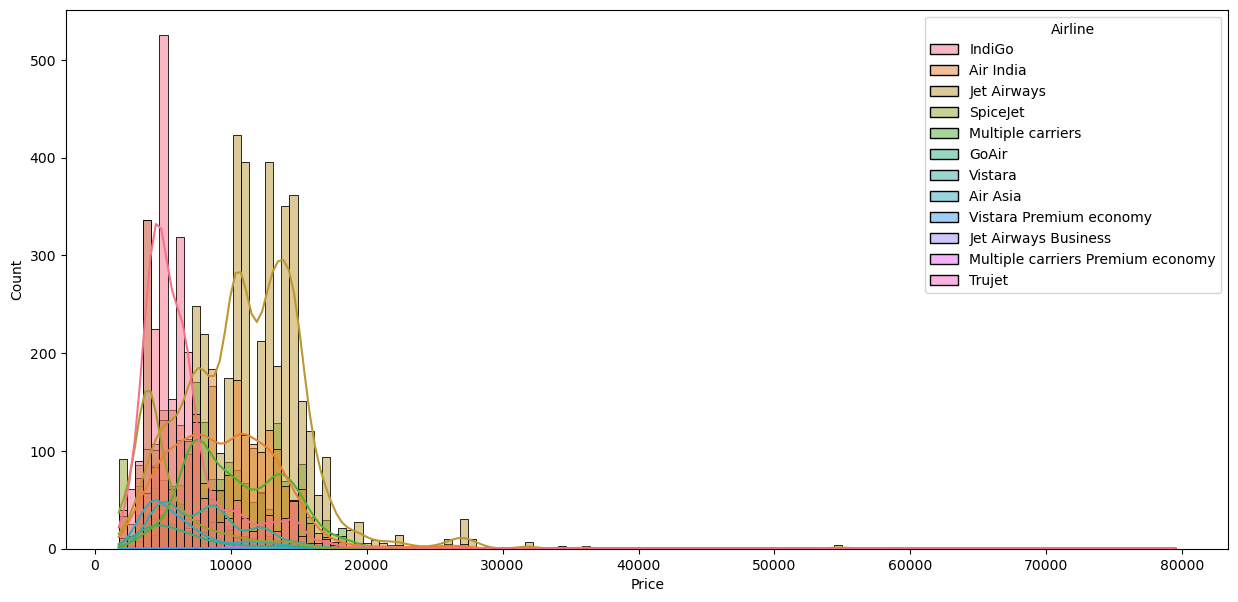

In [83]:
sns.histplot(final_df,x='Price',kde=True,hue='Airline')

<ul>
    <li>Indigo bags maximum amount of tickets with price below Rs:10000</li>

</ul>

In [84]:
flights_code=final_df.Route.value_counts().head(20).sort_values(ascending=False)
flights_code

DEL → BOM → COK          3000
BLR → DEL                1941
CCU → BOM → BLR          1232
CCU → BLR                 896
BOM → HYD                 785
CCU → DEL → BLR           689
BLR → BOM → DEL           509
MAA → CCU                 456
DEL → HYD → COK           411
DEL → JAI → BOM → COK     314
DEL → BLR → COK           287
DEL → COK                 262
DEL → AMD → BOM → COK     246
DEL → MAA → COK           190
DEL → IDR → BOM → COK     117
DEL → HYD → MAA → COK     100
DEL → NAG → BOM → COK      83
CCU → HYD → BLR            80
CCU → MAA → BLR            78
DEL → GOI → BOM → COK      73
Name: Route, dtype: int64

Text(0, 0.5, 'Count')

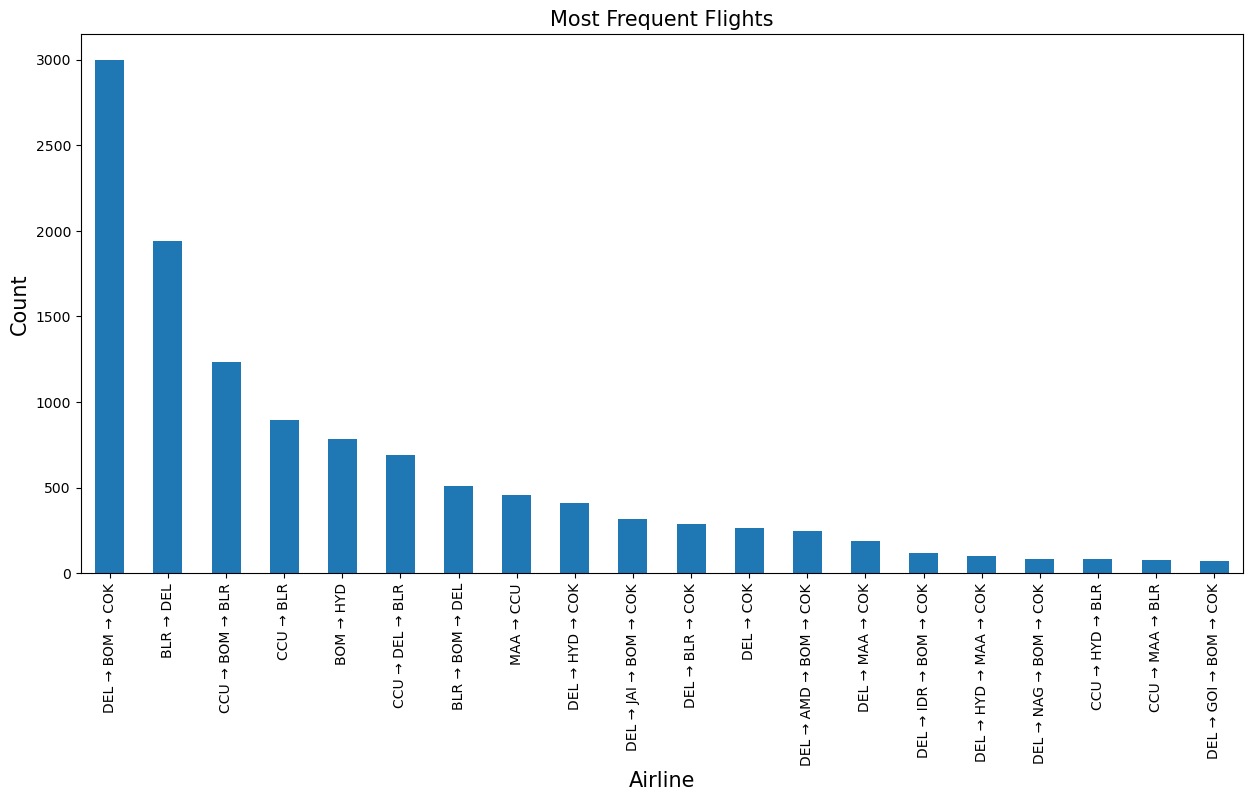

In [85]:
flights_code.plot(kind='bar')
plt.title('Most Frequent Flights',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)

Most Flights are from Delhi to Bombay

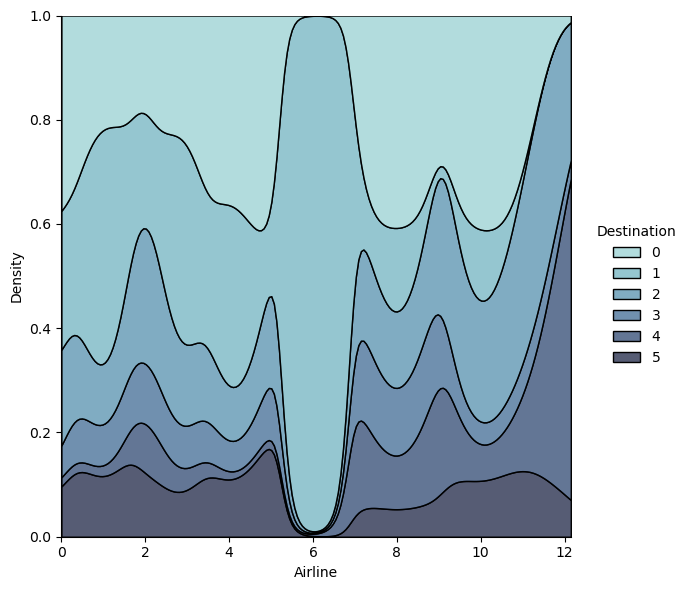

In [158]:
sns.displot(data=final_df,x="Airline", hue="Destination",kind="kde", height=6,multiple="fill", clip=(0, None),palette="ch:rot=-.25,hue=1,light=.75",)

[Text(0, 0.5, '')]

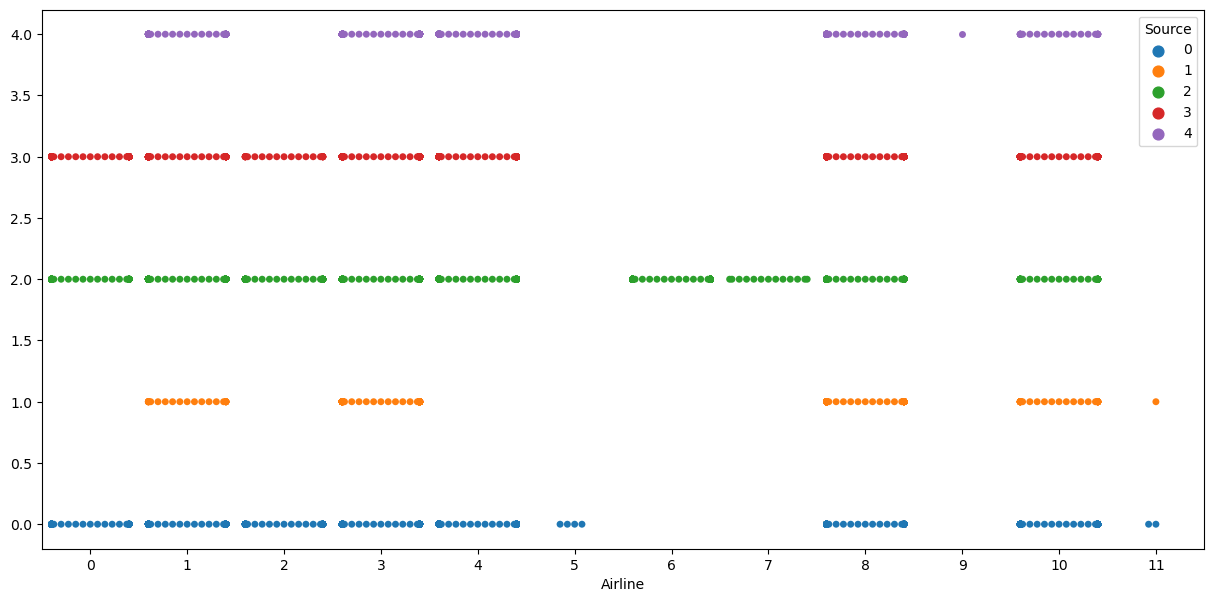

In [169]:
ax = sns.swarmplot(data=final_df, x="Airline", y="Source", hue="Source")
ax.set(ylabel="")

## FEATURE ENGINEERING

In [86]:
# splitting date of journey into month and year
final_df['Date']=final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month']=final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year']=final_df['Date_of_Journey'].str.split('/').str[2]
final_df.sample(7)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
7079,Jet Airways,21/03/2019,Delhi,Cochin,DEL → BDQ → BOM → COK,18:25,18:50 22 Mar,24h 25m,2 stops,No info,12347.0,21,03,2019
1962,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,10:00,21:00,11h,1 stop,No info,NaN,15,06,2019
2490,Jet Airways,18/05/2019,Banglore,Delhi,BLR → DEL,15:15,18:10,2h 55m,non-stop,No info,7229.0,18,05,2019
9491,IndiGo,3/04/2019,Delhi,Cochin,DEL → HYD → COK,07:35,12:10,4h 35m,1 stop,No info,5073.0,3,04,2019
3412,SpiceJet,6/06/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop,No info,3625.0,6,06,2019
1776,GoAir,18/05/2019,Delhi,Cochin,DEL → AMD → COK,07:25,13:35,6h 10m,1 stop,No info,6296.0,18,05,2019
4177,Air India,6/06/2019,Delhi,Cochin,DEL → BHO → BOM → COK,20:00,19:15 07 Jun,23h 15m,2 stops,No info,11596.0,6,06,2019


In [87]:
# Changing the data type of seperate columns
final_df['Date']=final_df['Date'].astype(int)
final_df['Month']=final_df['Month'].astype(int)
final_df['Year']=final_df['Year'].astype(int)

In [88]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.4+ MB


In [89]:
final_df.drop('Date_of_Journey',axis=1,inplace=True)
final_df.sample(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
7937,Vistara,Banglore,Delhi,BLR → DEL,19:30,22:15,2h 45m,non-stop,No info,5088.0,27,6,2019
726,GoAir,Delhi,Cochin,DEL → BOM → COK,14:25,19:35,5h 10m,1 stop,No info,10651.0,1,6,2019
3888,IndiGo,Kolkata,Banglore,CCU → BLR,09:35,12:20,2h 45m,non-stop,No info,4804.0,6,5,2019
4680,Jet Airways,Delhi,Cochin,DEL → BOM → COK,07:05,04:25 07 Mar,21h 20m,1 stop,No info,17234.0,6,3,2019
1634,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 25 Jun,19h,2 stops,No info,13882.0,24,6,2019


In [90]:
# Seperating the arrival time
final_df['Arrival_Time']=final_df['Arrival_Time'].str.split(' ').str[0]
final_df['Arrival_hour']=final_df['Arrival_Time'].str.split(':').str[0]
final_df['Arrival_minutes']=final_df['Arrival_Time'].str.split(':').str[1]
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int32  
 11  Month            13354 non-null  int32  
 12  Year             13354 non-null  int32  
 13  Arrival_hour     13354 non-null  object 
 14  Arrival_minutes  13354 non-null  object 
dtypes: float64(1), int32(3), object(11)
memory usage: 1.5+ MB


In [92]:
final_df['Arrival_hour']=final_df['Arrival_hour'].astype(int)
final_df['Arrival_minutes']=final_df['Arrival_minutes'].astype(int)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int32  
 11  Month            13354 non-null  int32  
 12  Year             13354 non-null  int32  
 13  Arrival_hour     13354 non-null  int32  
 14  Arrival_minutes  13354 non-null  int32  
dtypes: float64(1), int32(5), object(9)
memory usage: 1.4+ MB


In [93]:
final_df.drop('Arrival_Time',axis=1,inplace=True)
final_df

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,23h 55m,1 stop,No info,NaN,6,6,2019,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,2h 35m,non-stop,No info,NaN,27,3,2019,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,6h 35m,1 stop,No info,NaN,6,3,2019,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,15h 15m,1 stop,No info,NaN,6,3,2019,19,15


In [94]:
# Seperating Departure Time
final_df['Dep_Time']=final_df['Dep_Time'].str.split(' ').str[0]
final_df

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,23h 55m,1 stop,No info,NaN,6,6,2019,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,2h 35m,non-stop,No info,NaN,27,3,2019,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,6h 35m,1 stop,No info,NaN,6,3,2019,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,15h 15m,1 stop,No info,NaN,6,3,2019,19,15


In [95]:
final_df['Dep_hour']=final_df['Dep_Time'].str.split(':').str[0]
final_df['Dep_minutes']=final_df['Dep_Time'].str.split(':').str[1]
final_df

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,23h 55m,1 stop,No info,NaN,6,6,2019,20,25,20,30
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,2h 35m,non-stop,No info,NaN,27,3,2019,16,55,14,20
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,6h 35m,1 stop,No info,NaN,6,3,2019,4,25,21,50
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,15h 15m,1 stop,No info,NaN,6,3,2019,19,15,04,00


In [97]:
final_df['Dep_hour']=final_df['Dep_hour'].astype(int)
final_df['Dep_minutes']=final_df['Dep_minutes'].astype(int)

In [98]:
final_df.drop('Dep_Time',axis=1,inplace=True)
final_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1 stop,No info,NaN,6,6,2019,20,25,20,30
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,NaN,27,3,2019,16,55,14,20
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,1 stop,No info,NaN,6,3,2019,4,25,21,50
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,1 stop,No info,NaN,6,3,2019,19,15,4,0


In [103]:
# Changing the string fuctions in the 'Total_Stops' column to numerical values
final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop':0,'1 stop':2, 'stops':2,'3 stops':3,'4 stops':4,'nan':2})

In [107]:
final_df['Total_Stops'].isna().sum()

1900

In [108]:
final_df.drop('Route',axis=1,inplace=True)
final_df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,NaN,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,NaN,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,2.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,2.0,No info,13302.0,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,23h 55m,2.0,No info,NaN,6,6,2019,20,25,20,30
2667,IndiGo,Kolkata,Banglore,2h 35m,0.0,No info,NaN,27,3,2019,16,55,14,20
2668,Jet Airways,Delhi,Cochin,6h 35m,2.0,No info,NaN,6,3,2019,4,25,21,50
2669,Air India,Delhi,Cochin,15h 15m,2.0,No info,NaN,6,3,2019,19,15,4,0


In [111]:
# Converting Duration into Duration hour
final_df['duration_hour']=final_df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [112]:
final_df[final_df['duration_hour']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Dep_hour,Dep_minutes,duration_hour
6474,Air India,Mumbai,Hyderabad,5m,NaN,No info,17327.0,6,3,2019,16,55,16,50,5m
2660,Air India,Mumbai,Hyderabad,5m,NaN,No info,NaN,12,3,2019,16,55,16,50,5m


In [114]:
final_df.drop(6474,axis=0,inplace=True)
final_df.drop(2660,axis=0,inplace=True)
final_df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Dep_hour,Dep_minutes,duration_hour
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,NaN,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,19h,NaN,No info,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,5h 25m,2.0,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,4h 45m,2.0,No info,13302.0,1,3,2019,21,35,16,50,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,23h 55m,2.0,No info,NaN,6,6,2019,20,25,20,30,23
2667,IndiGo,Kolkata,Banglore,2h 35m,0.0,No info,NaN,27,3,2019,16,55,14,20,2
2668,Jet Airways,Delhi,Cochin,6h 35m,2.0,No info,NaN,6,3,2019,4,25,21,50,6
2669,Air India,Delhi,Cochin,15h 15m,2.0,No info,NaN,6,3,2019,19,15,4,0,15


In [115]:
final_df['duration_hour']=final_df['duration_hour'].astype(int)
final_df.drop('Duration',axis=1,inplace=True)
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Dep_hour,Dep_minutes,duration_hour
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,NaN,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,NaN,No info,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,2.0,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,2.0,No info,13302.0,1,3,2019,21,35,16,50,4


In [117]:
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [119]:
# Encodings
label=LabelEncoder()

In [121]:
final_df['Airline']=label.fit_transform(final_df['Airline'])
final_df['Source']=label.fit_transform(final_df['Source'])
final_df['Destination']=label.fit_transform(final_df['Destination'])
final_df['Additional_Info']=label.fit_transform(final_df['Additional_Info'])

In [123]:
final_df.shape

(13351, 14)

In [124]:
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Dep_hour,Dep_minutes,duration_hour
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,2
1,1,3,0,NaN,8,7662.0,1,5,2019,13,15,5,50,7
2,4,2,1,NaN,8,13882.0,9,6,2019,4,25,9,25,19
3,3,3,0,2.0,8,6218.0,12,5,2019,23,30,18,5,5
4,3,0,5,2.0,8,13302.0,1,3,2019,21,35,16,50,4


In [126]:
final_df.isna().sum()

Airline               0
Source                0
Destination           0
Total_Stops        1897
Additional_Info       0
Price              2670
Date                  0
Month                 0
Year                  0
Arrival_hour          0
Arrival_minutes       0
Dep_hour              0
Dep_minutes           0
duration_hour         0
dtype: int64

In [127]:
# Dropping the rows which has null values
final_df.dropna(inplace=True)
final_df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Dep_hour,Dep_minutes,duration_hour
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,2
3,3,3,0,2.0,8,6218.0,12,5,2019,23,30,18,5,5
4,3,0,5,2.0,8,13302.0,1,3,2019,21,35,16,50,4
5,8,3,0,0.0,8,3873.0,24,6,2019,11,25,9,0,2
6,4,0,5,2.0,5,11087.0,12,3,2019,10,25,18,55,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,8,0,2,0.0,7,3257.0,21,5,2019,8,35,5,55,2
10678,0,3,0,0.0,8,4107.0,9,4,2019,22,25,19,55,2
10679,1,3,0,0.0,8,4145.0,27,4,2019,23,20,20,45,2
10680,4,0,2,0.0,8,7229.0,27,4,2019,11,20,8,20,3


In [128]:
final_df.isna().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Arrival_hour       0
Arrival_minutes    0
Dep_hour           0
Dep_minutes        0
duration_hour      0
dtype: int64

In [129]:
final_df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Date', 'Month', 'Year', 'Arrival_hour', 'Arrival_minutes',
       'Dep_hour', 'Dep_minutes', 'duration_hour'],
      dtype='object')

In [130]:
# Changing the postion of price to last
old_cols=final_df.columns.values
new_cols=['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Date', 'Month', 'Year', 'Arrival_hour', 'Arrival_minutes',
       'Dep_hour', 'Dep_minutes', 'duration_hour','Price']
final_df=final_df.reindex(columns=new_cols)

In [131]:
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Arrival_hour,Arrival_minutes,Dep_hour,Dep_minutes,duration_hour,Price
0,3,0,5,0.0,8,24,3,2019,1,10,22,20,2,3897.0
3,3,3,0,2.0,8,12,5,2019,23,30,18,5,5,6218.0
4,3,0,5,2.0,8,1,3,2019,21,35,16,50,4,13302.0
5,8,3,0,0.0,8,24,6,2019,11,25,9,0,2,3873.0
6,4,0,5,2.0,5,12,3,2019,10,25,18,55,15,11087.0


## Model Creation

In [134]:
x=final_df.iloc[:,:-1].values
y=final_df.iloc[:,-1].values
x

array([[ 3.,  0.,  5., ..., 22., 20.,  2.],
       [ 3.,  3.,  0., ..., 18.,  5.,  5.],
       [ 3.,  0.,  5., ..., 16., 50.,  4.],
       ...,
       [ 1.,  3.,  0., ..., 20., 45.,  2.],
       [ 4.,  0.,  2., ...,  8., 20.,  3.],
       [10.,  0.,  5., ..., 11., 30.,  2.]])

In [135]:
y

array([ 3897.,  6218., 13302., ...,  4145.,  7229., 12648.])

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
print(x.shape,x_train.shape,x_test.shape)

(9162, 13) (7329, 13) (1833, 13)


In [140]:
scaler=StandardScaler()
scaler.fit_transform(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_test

array([[ 0.75407766,  0.0655744 , -0.33115211, ..., -0.26908457,
         0.31239346, -0.20697491],
       [-0.50992367, -1.54176603,  2.28769202, ...,  1.11595329,
         0.576682  , -0.47521878],
       [-0.50992367,  0.0655744 , -0.33115211, ..., -1.82725216,
        -1.27333781, -0.47521878],
       ...,
       [-1.77392501,  0.0655744 , -0.33115211, ..., -0.9616035 ,
         1.63383618, -0.47521878],
       [-1.35259123, -1.54176603,  2.28769202, ..., -1.13473323,
         1.63383618, -0.34109684],
       [-1.35259123,  0.0655744 , -0.33115211, ..., -0.09595483,
         0.31239346,  1.53661026]])

In [176]:
models=[LinearRegression(),SVR(),DecisionTreeRegressor(),RandomForestRegressor()]

for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    mae=mean_absolute_error(y_test,y_pred)
    mape=mean_absolute_percentage_error(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    r2=r2_score(y_test,y_pred)
    print("{}:: MAE:{} \nMAPE: {} \nRMSE: {} \nR2: {}\n".format(model,mae,mape,rmse,r2),end='\n\n')

LinearRegression():: MAE:2427.828437322878 
MAPE: 0.31464071477218947 
RMSE: 3568.857020907356 
R2: 0.4203233001383384


SVR():: MAE:3306.5433017995483 
MAPE: 0.42714036662421945 
RMSE: 4721.9350082342835 
R2: -0.014769852416821383


DecisionTreeRegressor():: MAE:760.9396253864338 
MAPE: 0.089915202906227 
RMSE: 1992.8771483899584 
R2: 0.8192457154544952


RandomForestRegressor():: MAE:655.4432602594411 
MAPE: 0.07658120335354089 
RMSE: 1606.6556971416226 
R2: 0.8825174991928932




The above analysis depicts that Randomforest Regressor provides the best result for the given set which privide an R2 Score of 0.88.